**Importación de librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import warnings
warnings.filterwarnings('ignore')

In [2]:
hechos = pd.read_csv('datasets/hechos.csv', encoding='utf-8')

In [3]:
hechos.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


In [7]:
hechos.shape

(696, 21)

**Búsqueda de valores nulos**

In [17]:
hechos.isnull().any(axis=0)

ID                       False
N_VICTIMAS               False
FECHA                    False
AAAA                     False
MM                       False
DD                       False
HORA                     False
HH                       False
LUGAR_DEL_HECHO          False
TIPO_DE_CALLE            False
Calle                     True
Altura                    True
Cruce                     True
Dirección Normalizada     True
COMUNA                   False
XY (CABA)                False
pos x                    False
pos y                    False
PARTICIPANTES            False
VICTIMA                  False
ACUSADO                  False
dtype: bool

In [19]:
hechos.Calle.isnull().value_counts()

Calle
False    695
True       1
Name: count, dtype: int64

In [20]:
hechos.Altura.isnull().value_counts()

Altura
True     567
False    129
Name: count, dtype: int64

In [21]:
hechos.Cruce.isna().value_counts()

Cruce
False    525
True     171
Name: count, dtype: int64

In [22]:
hechos['Dirección Normalizada'].isna().value_counts()

Dirección Normalizada
False    688
True       8
Name: count, dtype: int64

In [13]:
hechos['Dirección Normalizada'].head()

0    PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...
1                 PAZ, GRAL. AV. y DE LOS CORRALES AV.
2                                  ENTRE RIOS AV. 2034
3            LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.
4              SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.
Name: Dirección Normalizada, dtype: object

Los datos faltantes están siempre en relación con la dirección del siniestro. Podemos usar la columna **Dirección Normalizada** que solo tiene 8 valores nulos.

**No hay duplicados**

In [11]:
hechos.ID.duplicated().value_counts()

ID
False    696
Name: count, dtype: int64

In [12]:
hechos.duplicated().value_counts()

False    696
Name: count, dtype: int64

**Modificamos los tipo de dato en algunas columnas para facilitar el análisis**

In [44]:
hechos.dtypes

ID                        object
N_VICTIMAS                 int64
FECHA                     object
AAAA                       int64
MM                         int64
DD                         int64
HORA                      object
HH                        object
LUGAR_DEL_HECHO           object
TIPO_DE_CALLE             object
Calle                     object
Altura                   float64
Cruce                     object
Dirección Normalizada     object
COMUNA                     int64
XY (CABA)                 object
pos x                     object
pos y                     object
PARTICIPANTES             object
VICTIMA                   object
ACUSADO                   object
dtype: object

In [3]:
hechos['FECHA'] = pd.to_datetime(hechos['FECHA'], errors='coerce')

In [4]:
hechos['HORA'] = pd.to_datetime(hechos['HORA'], format='%H:%M:%S', errors='coerce').dt.time

In [7]:
hechos['HH'] = pd.to_numeric(hechos['HH'], errors='coerce').astype('Int64')

**Busquemos cuántas víctimas suele haber por siniestro**

In [8]:
hechos.N_VICTIMAS.value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

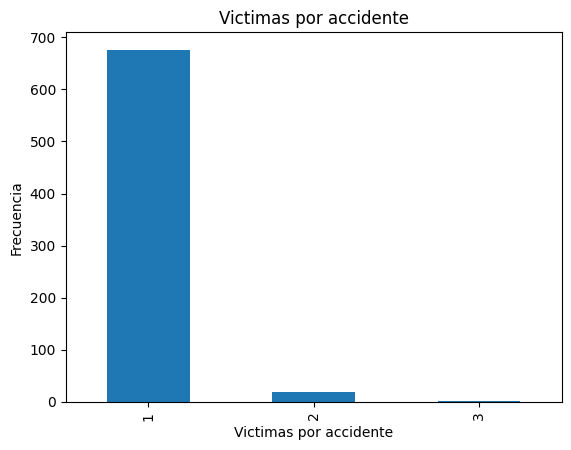

In [9]:
victimas_por_accidente = hechos.N_VICTIMAS.value_counts()

# Graficamos como grafico de barras
victimas_por_accidente.plot(kind='bar')

#Etiquetas
plt.xlabel('Victimas por accidente')
plt.ylabel('Frecuencia')
plt.title('Victimas por accidente')

plt.show()

Si buscamos la cantidad de víctima por comuna sobresalen la **Comuna 1** *(Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución.)*, la **Comuna 9** *(Liniers, Mataderos y Parque Avellaneda)* y la **Comuna 4** *(La Boca, Barracas, Parque Patricios y Nueva Pompeya)*.

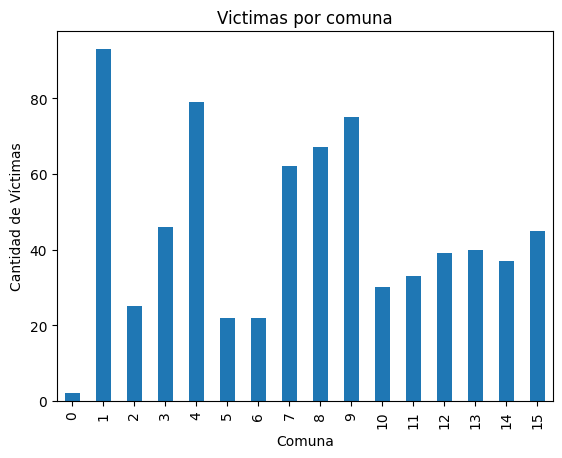

In [56]:
victimas_por_comuna = hechos.groupby(['COMUNA']).N_VICTIMAS.sum()
victimas_por_comuna.plot(kind='bar')


#Etiquetas
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.title('Victimas por comuna')

plt.show()

Si ahora agrupamos por tipo de calle vemos que la gran mayoría de hechos suceden en **avenidas**

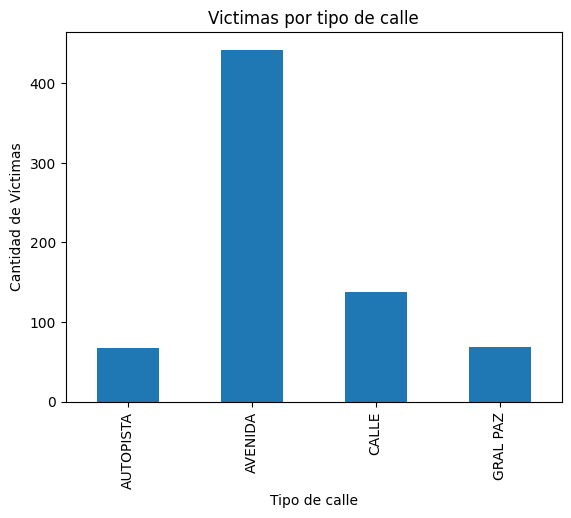

In [127]:
victimas_por_comuna = hechos.groupby(['TIPO_DE_CALLE']).N_VICTIMAS.sum()
victimas_por_comuna.plot(kind='bar')


#Etiquetas
plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de Víctimas')
plt.title('Victimas por tipo de calle')

plt.show()

**Investigamos si el horarios es un factor relevante**

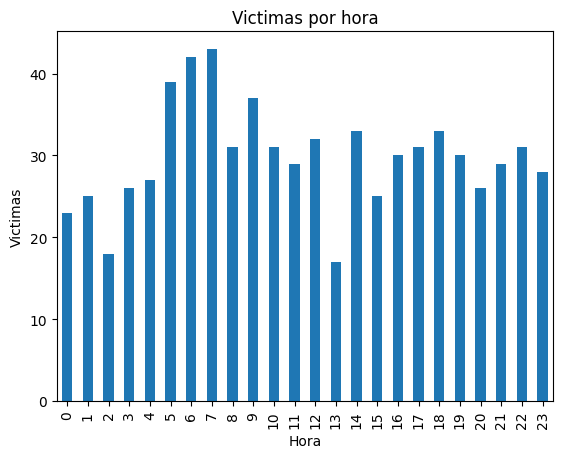

In [54]:
victimas_por_hora = hechos.groupby('HH', as_index=False).N_VICTIMAS.sum()
victimas_por_hora.sort_values(by='HH', ascending=True).N_VICTIMAS.plot(kind= 'bar')

#Etiquetas
plt.xlabel('Hora')
plt.ylabel('Victimas')
plt.title('Victimas por hora')

plt.show()

**Es interesante que la franja horaria de 5 a 7 de la mañana es en la que más víctimas se encuentran**

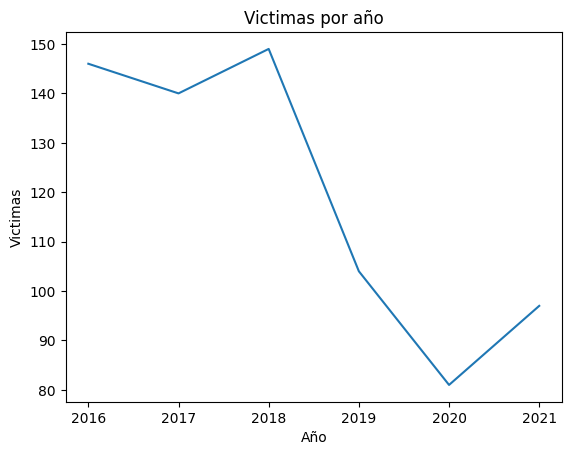

In [12]:
victimas_por_año = hechos.groupby(['AAAA']).N_VICTIMAS.sum()

victimas_por_año.plot(kind='line')


#Etiquetas
plt.xlabel('Año')
plt.ylabel('Victimas')
plt.title('Victimas por año')

plt.show()

**Se observa que el número de víctimas disminuyó en los años 2019 y 2020 (sería interesante evaluar si la pandemia tuvo algún efecto ese año).** 

**Si evaluamos la cantidad de víctimas promedio por mes del año, vemos que el promedio es más o menos constante con una suba en el mes de diciembre.**

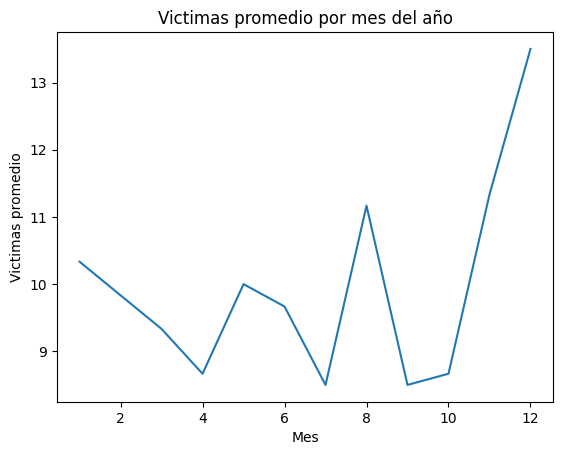

In [13]:
victimas_por_mes = hechos.groupby(['MM']).N_VICTIMAS.sum()/6

victimas_por_mes.plot(kind='line')


#Etiquetas
plt.xlabel('Mes')
plt.ylabel('Victimas promedio')
plt.title('Victimas promedio por mes del año')

plt.show()

Veamos cuáles son las 10 combinaciones de participantes más comunes en accidentes

<Axes: xlabel='PARTICIPANTES'>

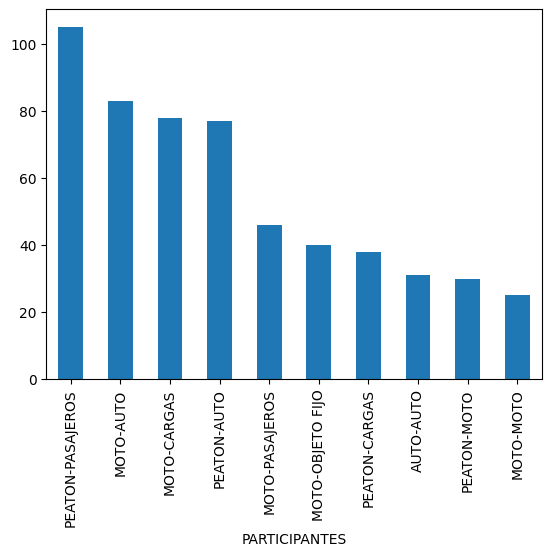

In [30]:
hechos.groupby(['PARTICIPANTES'])['ID'].count().nlargest(10).plot(kind='bar')

Esta columna contiene la combinación de dos participantes que generaron un accidente. Es interesante verlo por participante suelto. 

In [18]:
#genero una lista con todos los participantes separando a cada partipante dentro de cada combinación. El set me deja valores sin repetir
participantes = set([ e  for element in list(hechos.PARTICIPANTES.unique()) for e in element.split('-')])

In [19]:
#construyo un diccionario "participante": N de accidentes en los que está involucrado.
accidentes_por_participante = {p:0 for p in participantes}
for item in hechos.groupby(['PARTICIPANTES'])['ID'].count().items():
    for key in accidentes_por_participante:
        if key in item[0]:
            accidentes_por_participante[key] += int(item[1])

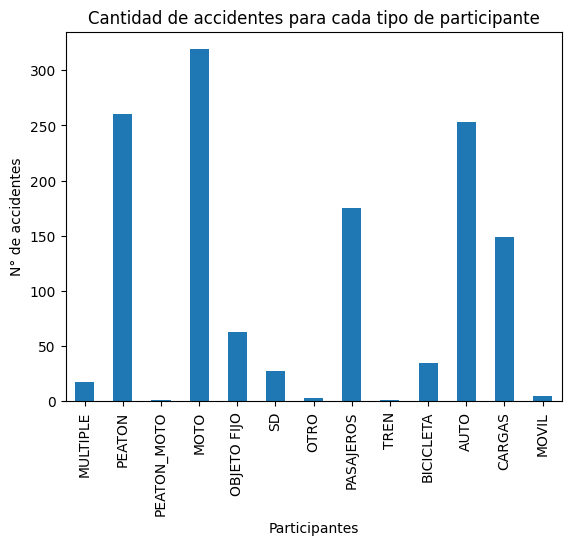

In [20]:
#grafiquemos esto para mostrar cuál es el participante con mayor cantidad de accidentes.

df = pd.DataFrame(list(accidentes_por_participante.items()), columns=['Participante', 'N_accidentes'])

# Crear el gráfico de barras
df.plot(kind='bar', x='Participante', y='N_accidentes', legend=None)

# Añadir etiquetas y título
plt.xlabel('Participantes')
plt.ylabel('N° de accidentes')
plt.title('Cantidad de accidentes para cada tipo de participante')

# Mostrar el gráfico
plt.show()

**Exporto este pequeño DataFrame para poder usarlo en PowerBI**

In [21]:
df.to_csv("datasets/Participantes.csv", index=False)

**Motos**, **Autos** y **Peatones** los participantes más frecuentes. Con **motos** en primer lugar. Si fuera a hacerse algún tipo de campaña de prevención tendría sentido apuntar a este grupo. 

In [42]:
hechos.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


Veamos cuáles son los **acusados** más comunes.

Text(0.5, 1.0, 'Cantidad de víctimas generadas por tipo de acusado')

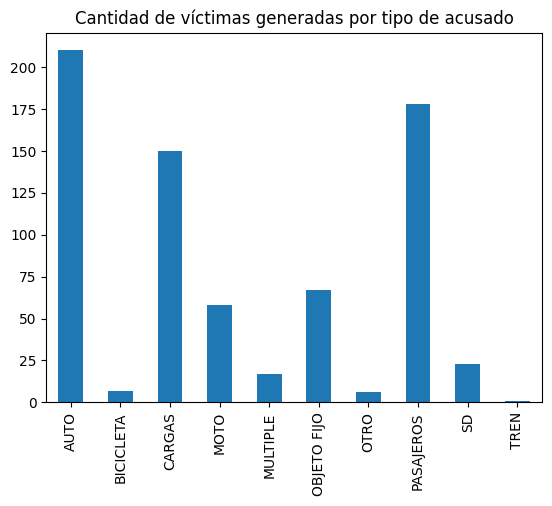

In [136]:
hechos.groupby(['ACUSADO'])['N_VICTIMAS'].sum().plot(kind='bar')
# Añadir etiquetas y título
plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de víctimas generadas por tipo de acusado')

**Transporte de Cargas**, **Autos**, y **Transporte de Pasajeros** los acusados que más víctimas generan.

Veamos cuáles son las **víctimas** más comunes.

Text(0.5, 1.0, 'Cantidad de víctimas generadas por tipo de víctima')

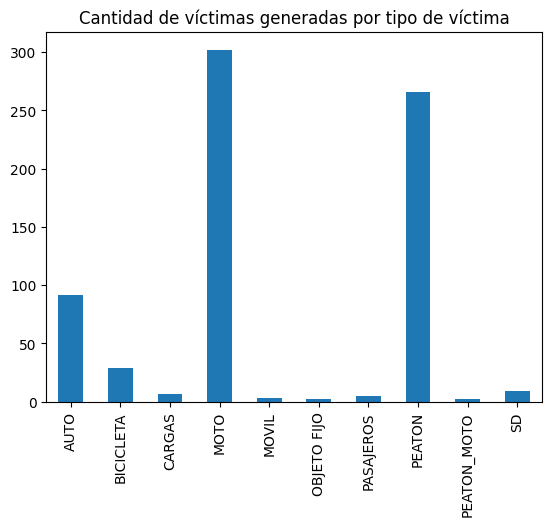

In [138]:
hechos.groupby(['VICTIMA'])['N_VICTIMAS'].sum().plot(kind='bar')
# Añadir etiquetas y título
plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de víctimas generadas por tipo de víctima')

**Motos** y **Peatones** las víctimas más comunes.

Ahora veamos dentro de los acusados más frecuentes, cómo se distribuyen las víctimas que generan.

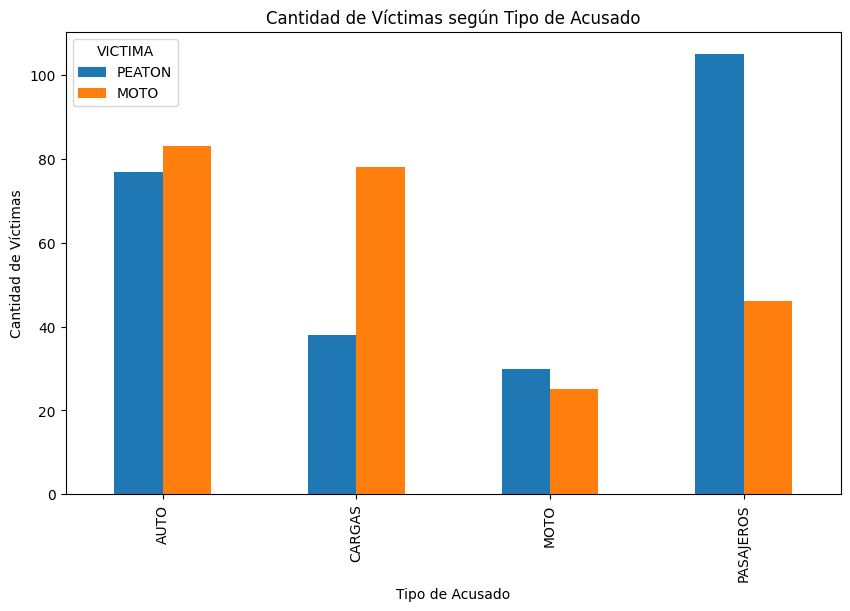

In [123]:
conteo_victimas_por_acusado = hechos.groupby('ACUSADO')['VICTIMA'].value_counts().unstack(fill_value=0)

#Filtro los acusados más comunes para facilicitar la comprensión del gráfico. 
mascara = (conteo_victimas_por_acusado.index.isin(['MOTO', 'PASAJEROS', 'CARGAS', 'AUTO']))

# Crear el gráfico de columnas
conteo_victimas_por_acusado[mascara][['PEATON', 'MOTO']].plot(kind='bar', width=.5, stacked=False, figsize=(10, 6))

# Añadir etiquetas y título
plt.xlabel('Tipo de Acusado')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas según Tipo de Acusado')


# Mostrar el gráfico
plt.show()

Los **transporte de pasajeros** suelen generar víctimas **peatones**. Los **transportes de cargas** víctimas **motos**. **Autos y motos** generan casi por igual víctimas peatones y motos.

**Veamos si la cantidad de víctimas por tipo varían con los años**

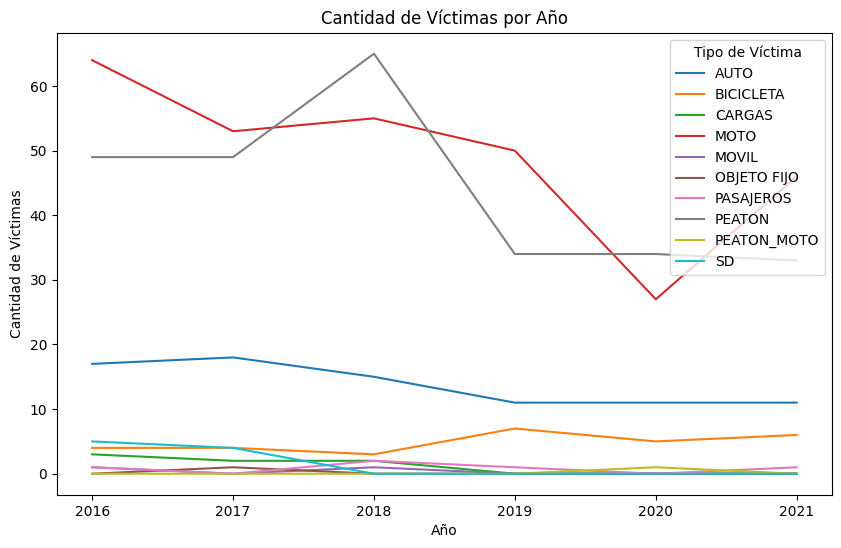

In [18]:
pivotado = hechos.pivot_table(index='AAAA', columns='VICTIMA', aggfunc='size', fill_value=0)

# Crea el gráfico de líneas
pivotado.plot(kind='line', figsize=(10, 6))

# Añade etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Año')

# Muestra el gráfico
plt.legend(title='Tipo de Víctima')
plt.show()

In [10]:
hechos.to_csv('hechos_final.csv', index=False)

Vemos que en  **Motos** se repite el patrón de reducción en 2019 y especialmente en 2020 con un "rebote" en 2021

**Pasemos ahora a analizar el dataset de victimas**

In [11]:
victimas = pd.read_csv('datasets/victimas.csv', encoding='utf-8')

In [23]:
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016


**Análisis de nulos y duplicados y tipos de datos**

In [65]:
victimas.dtypes

ID_hecho               object
FECHA                  object
AAAA                    int64
MM                      int64
DD                      int64
ROL                    object
VICTIMA                object
SEXO                   object
EDAD                    Int64
FECHA_FALLECIMIENTO    object
dtype: object

In [12]:
victimas['FECHA'] = pd.to_datetime(victimas['FECHA'], errors='coerce')
victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(victimas['FECHA_FALLECIMIENTO'], errors='coerce')

In [62]:
victimas.shape

(717, 10)

In [38]:
victimas[victimas.EDAD == 'SD'].count()

ID_hecho               68
FECHA                  68
AAAA                   68
MM                     68
DD                     68
ROL                    68
VICTIMA                68
SEXO                   68
EDAD                   68
FECHA_FALLECIMIENTO    68
dtype: int64

Convertimos la variable edad a númerica. Los valores 'SD' los convertimos en nulos. Además vamos a discretizar la variable edad en la nueva columna **Rango_etario**. Esto facilitará el análisis cuando queramos encontrar diferencia por edades.

<Axes: xlabel='EDAD'>

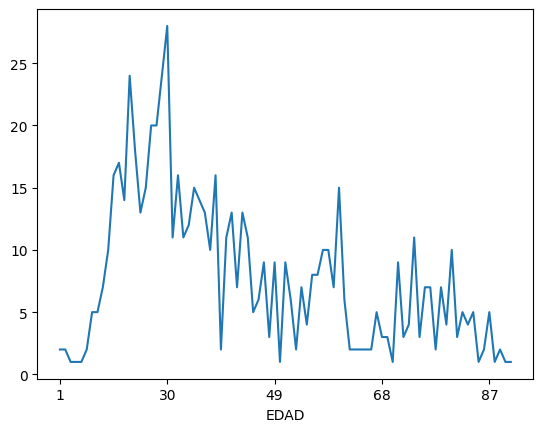

In [41]:
victimas[victimas.EDAD != 'SD'].groupby('EDAD').EDAD.value_counts().plot(kind='line')

Viendo cómo se distribuyen las víctimas en función de las edades podemos inducir los valores para los rangos de edades. 

In [13]:
victimas.EDAD = pd.to_numeric(victimas['EDAD'], errors='coerce').astype('Int64')

In [14]:
bins = [0, 18, 25, 35, 45, 60, 70, 80, float('inf')]
labels = ['0-18', '18-25', '25-35', '35-45', '45-60', '60-70', '70-80', '80+']

# Discretizar la columna 'Edad'
victimas['Rango_etario'] = pd.cut(victimas['EDAD'], bins=bins, labels=labels, right=False)

**La variable SEXO podría ser convertida en booleana, esto principalmente ahorraría espacio en memoria. Pero al ser pequeño el dataset preferimos quedarnos con el string que hará más claro y legible el código**

In [15]:
victimas.SEXO = victimas.SEXO.astype(str)

In [27]:
victimas.EDAD.isna().value_counts()

EDAD
False    664
True      53
Name: count, dtype: int64

**Búsqueda de valores nulos**

In [73]:
victimas.isnull().any(axis=0)

ID_hecho               False
FECHA                  False
AAAA                   False
MM                     False
DD                     False
ROL                    False
VICTIMA                False
SEXO                   False
EDAD                    True
FECHA_FALLECIMIENTO    False
Rango_etario            True
dtype: bool

**Veamos cómo se distribuyen las víctimas en función de la edad**

In [72]:
print(f'Promedio de edad de las víctimas: {round(victimas.EDAD.mean(),2)}')
print(f'Edad más común en las víctimas: {victimas.EDAD.median()}')

Promedio de edad de las víctimas: 42.17
Edad más común en las víctimas: 37.0


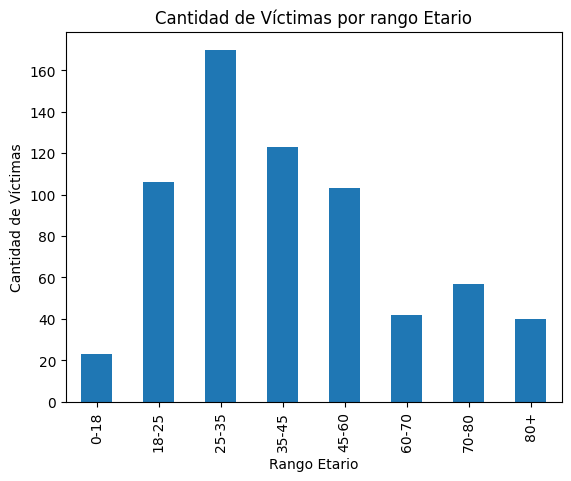

In [59]:
victimas.groupby('Rango_etario')['ROL'].count().plot(kind='bar')

# Añade etiquetas y título
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por rango Etario')

# Muestra el gráfico
plt.show()

Ahora veamos algunos análisis por Sexo.

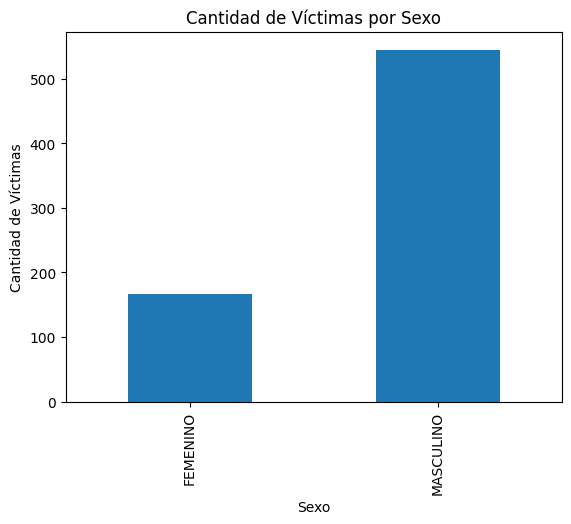

In [70]:
#filtro para dejar afuera los valores nulos. 
mask = victimas['SEXO'].isin(['MASCULINO', 'FEMENINO'])

victimas[mask].groupby('SEXO').ROL.count().plot(kind='bar')

# Añade etiquetas y título
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Sexo')

# Muestra el gráfico
plt.show()

La mayor cantidad de víctimas son **hombres**. 

Diferenciamos por **SEXO** y **RANGO ETARIO**

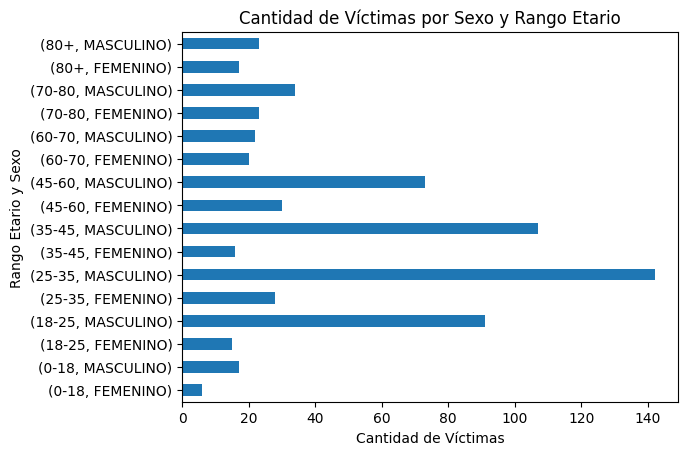

In [71]:
victimas[mask].groupby(['Rango_etario', 'SEXO'])['ROL'].count().plot(kind='barh')

plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Rango Etario y Sexo')
plt.title('Cantidad de Víctimas por Sexo y Rango Etario')

# Muestra el gráfico
plt.show()

Este análisis nos permite pensar en hacer algún tipo de campaña de prevención o concientización, y apuntar a **hombres** de entre **18 y 45** años.

Si agrupamos por **SEXO** y **ROL** nos encontramos con que hombres conductores son el porcentaje más amplio de víctimas.

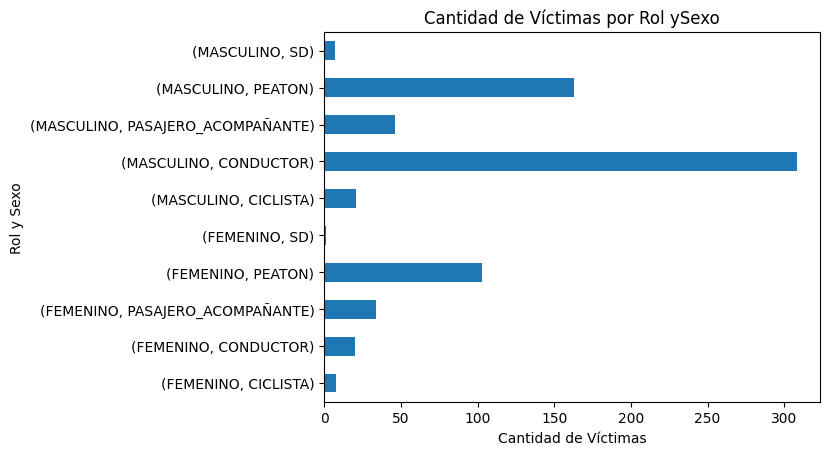

In [72]:
victimas[mask].groupby(['SEXO', 'ROL'])['ROL'].count().plot(kind='barh')

plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Rol y Sexo')
plt.title('Cantidad de Víctimas por Rol y Sexo')

# Muestra el gráfico
plt.show()

Ahora hagamos lo mismo para el **tipo de vehículo** y el **Sexo**

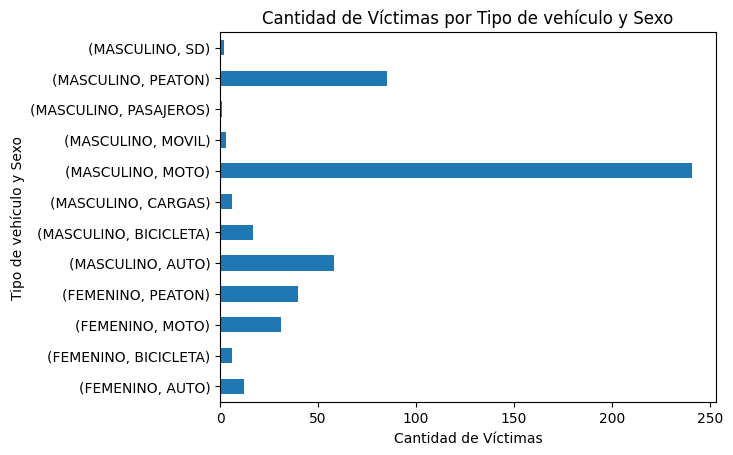

In [89]:
victimas[mask].groupby(['SEXO', 'VICTIMA'])['VICTIMA'].count().plot(kind='barh')

plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Tipo de vehículo y Sexo')
plt.title('Cantidad de Víctimas por Tipo de vehículo y Sexo')

# Muestra el gráfico
plt.show()

La mayor cantidad de víctimas son **motos** seguidas de **peatones**. Veamos cómo se distribuye eso en función de la edad.

In [103]:
victimas.groupby('Rango_etario')['VICTIMA'].agg(lambda x: x.value_counts().index[0]).reset_index()

,Rango_etario,VICTIMA
0,0-18,PEATON
1,18-25,MOTO
2,25-35,MOTO
3,35-45,MOTO
4,45-60,PEATON
5,60-70,PEATON
6,70-80,PEATON
7,80+,PEATON


**Motos** para el rango **18-45**. En el resto de las edades la mayor cantidad de víctimas son **peatones**.

Finalmente, datos coincidentes con el análisis del dataset de hechos. La mayor cantidad de víctimas involucradas son **motos**.

Exportamos el df con los cambios realizados para poder utilizarlo en el tablero. 

In [16]:
victimas.to_csv('datasets/victimas_final.csv', index=False)